Daffa Razqa Dwinugraha - 0706022310034

Sherin Alvinia Yonatan - 0706022310013

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import tree
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report
from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report

In [3]:
# load dataset
pd.set_option('display.max_columns', None) # Display all columns

url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/Bank%20(1).csv"
df = pd.read_csv(url, sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [5]:
# get statistical info from dataset
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [6]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Preprocessing

In [7]:
# show unique values from dataset
unique_values = {col: df[col].unique() for col in df.columns}
display(unique_values)

{'age': array([30, 33, 35, 59, 36, 39, 41, 43, 20, 31, 40, 56, 37, 25, 38, 42, 44,
        26, 55, 67, 53, 68, 32, 49, 78, 23, 52, 34, 61, 45, 48, 57, 54, 63,
        51, 29, 50, 27, 60, 28, 21, 58, 22, 46, 24, 77, 75, 47, 70, 65, 64,
        62, 66, 19, 81, 83, 80, 71, 72, 69, 79, 73, 86, 74, 76, 87, 84]),
 'job': array(['unemployed', 'services', 'management', 'blue-collar',
        'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
        'housemaid', 'retired', 'unknown'], dtype=object),
 'marital': array(['married', 'single', 'divorced'], dtype=object),
 'education': array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object),
 'default': array(['no', 'yes'], dtype=object),
 'balance': array([ 1787,  4789,  1350, ...,  -333, -3313,  1137], shape=(2353,)),
 'housing': array(['no', 'yes'], dtype=object),
 'loan': array(['no', 'yes'], dtype=object),
 'contact': array(['cellular', 'unknown', 'telephone'], dtype=object),
 'day': array([19, 11, 16,  3,  5, 23, 

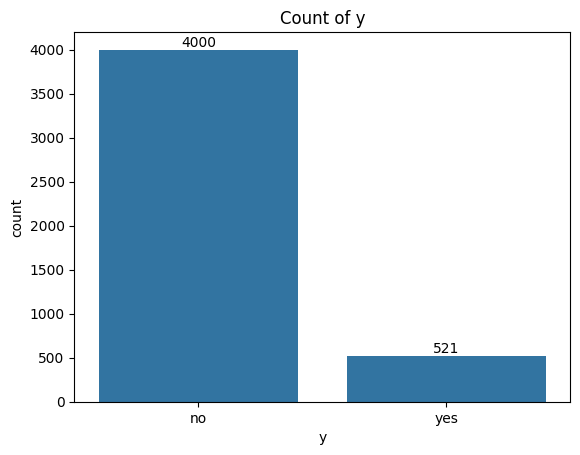

In [8]:
ax = sns.countplot(data=df, x='y')
plt.title('Count of y')

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container)
plt.show()


In [9]:
# Duplikasi dataframe untuk versi encoded
df_encoded = df.copy()

# 1. Binary Encoding
binary_map = {
    'default': {'no': 0, 'yes': 1},
    'housing': {'no': 0, 'yes': 1},
    'loan': {'no': 0, 'yes': 1},
    'y': {'no': 0, 'yes': 1}
}

for col, mapping in binary_map.items():
    if col in df_encoded.columns:
        df_encoded[col] = df_encoded[col].map(mapping)

# 2. Ordinal Encoding
Month_mapping = {
    'jan': 0,
    'feb': 1,
    'mar': 2,
    'apr': 3,
    'may': 4,
    'jun': 5,
    'jul': 6,
    'aug': 7,
    'sep': 8,
    'oct': 9,
    'nov': 10,
    'dec': 11
}
df_encoded['month'] = df_encoded['month'].map(Month_mapping)
Education_mapping = {
    'unknown': 0,
    'primary': 1,
    'secondary': 2,
    'tertiary': 3
}

df_encoded['education'] = df_encoded['education'].map(Education_mapping)
# 3. Nominal Encoding
nominal_cols = ['job','poutcome','contact','marital']
encoder = OrdinalEncoder()
df_encoded[nominal_cols] = encoder.fit_transform(df_encoded[nominal_cols]) 

encode_dict = {}

for col, cats in zip(nominal_cols,encoder.categories_):
    encode_dict[col] = {category: int(code) for code, category in enumerate(cats)}

import pprint
pprint.pprint(encode_dict)

df_encoded.sample(n = 5)

{'contact': {'cellular': 0, 'telephone': 1, 'unknown': 2},
 'job': {'admin.': 0,
         'blue-collar': 1,
         'entrepreneur': 2,
         'housemaid': 3,
         'management': 4,
         'retired': 5,
         'self-employed': 6,
         'services': 7,
         'student': 8,
         'technician': 9,
         'unemployed': 10,
         'unknown': 11},
 'marital': {'divorced': 0, 'married': 1, 'single': 2},
 'poutcome': {'failure': 0, 'other': 1, 'success': 2, 'unknown': 3}}


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1253,54,2.0,1.0,2,0,653,1,0,2.0,15,4,352,1,-1,0,3.0,0
3233,19,8.0,2.0,0,0,1169,0,0,0.0,6,1,463,18,-1,0,3.0,0
3911,48,4.0,1.0,2,0,2294,1,0,2.0,26,4,251,11,-1,0,3.0,0
517,36,1.0,1.0,1,0,1925,1,0,0.0,20,3,904,2,-1,0,3.0,1
1264,54,10.0,1.0,1,0,541,1,0,0.0,3,1,237,3,-1,0,3.0,0


Data Seperate

In [10]:
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

In [11]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,30,10.0,1.0,1,0,1787,0,0,0.0,19,9,79,1,-1,0,3.0
1,33,7.0,1.0,2,0,4789,1,1,0.0,11,4,220,1,339,4,0.0
2,35,4.0,2.0,3,0,1350,1,0,0.0,16,3,185,1,330,1,0.0
3,30,4.0,1.0,3,0,1476,1,1,2.0,3,5,199,4,-1,0,3.0
4,59,1.0,1.0,2,0,0,1,0,2.0,5,4,226,1,-1,0,3.0


In [12]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

Split Data

In [13]:
# Split data 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

X_train.shape, X_test.shape

((3390, 16), (1131, 16))

In [14]:
X_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
4384,52,4.0,2.0,3,0,4,0,1,0.0,28,6,30,9,-1,0,3.0
2560,44,1.0,1.0,2,0,1071,1,0,0.0,11,4,143,3,357,1,0.0
1470,55,1.0,1.0,1,0,4103,0,0,0.0,19,10,291,1,-1,0,3.0
1771,37,4.0,1.0,3,0,347,1,0,0.0,22,6,282,1,-1,0,3.0
2604,57,4.0,1.0,0,0,0,0,0,0.0,30,8,585,1,-1,0,3.0


In [15]:
X_test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
4274,35,1.0,1.0,1,0,378,1,0,2.0,16,4,427,3,-1,0,3.0
72,31,4.0,2.0,3,0,6248,1,0,2.0,9,4,154,2,-1,0,3.0
1065,30,10.0,1.0,3,0,0,1,0,0.0,18,10,756,1,-1,0,3.0
3185,42,0.0,1.0,2,0,529,1,1,0.0,19,10,193,3,-1,0,3.0
130,41,1.0,1.0,1,0,168,1,0,0.0,18,10,187,3,-1,0,3.0


Decision Tree

In [16]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

y_pred_train = tree.predict(X_train)
y_pred_test = tree.predict(X_test)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3007
           1       1.00      1.00      1.00       383

    accuracy                           1.00      3390
   macro avg       1.00      1.00      1.00      3390
weighted avg       1.00      1.00      1.00      3390


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       993
           1       0.43      0.42      0.43       138

    accuracy                           0.86      1131
   macro avg       0.68      0.67      0.67      1131
weighted avg       0.86      0.86      0.86      1131



## Oversampling using SMOTENC

In [17]:
# using SMOTE-NC for dataset containing numerical and categorical features.

from imblearn.over_sampling import SMOTENC

# we should define the categorical features first to make oversampling more accurate
categorical_features = [
    'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'

]

smotenc = SMOTENC(categorical_features=categorical_features, random_state=42)
X, y = smotenc.fit_resample(X, y)

# dont forget to always do partitioning AFTER undersampling/oversampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# check the shape of X_train and X_test
X_train.shape, X_test.shape

((5600, 16), (2400, 16))

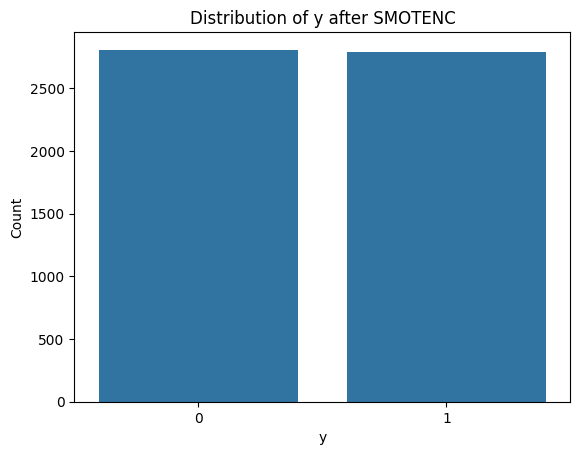

In [18]:
# visualize the distribution of target class after SMOTENC

sns.countplot(x=y_train)
plt.title('Distribution of y after SMOTENC')
plt.xlabel('y')
plt.ylabel('Count')
plt.show()

XGBOOST with no classfication

In [19]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(
    n_estimators=200,      # jumlah pohon boosting
    learning_rate=0.1,     # seberapa cepat model belajar
    max_depth=3,           # kedalaman tiap pohon
    random_state=42
)

In [20]:
gb.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=200, random_state=42)

In [21]:
# Prediksi di data training
y_pred_train = gb.predict(X_train)

# Prediksi di data test
y_pred_test = gb.predict(X_test)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       0.95      0.92      0.93      2808
           1       0.92      0.95      0.94      2792

    accuracy                           0.93      5600
   macro avg       0.93      0.93      0.93      5600
weighted avg       0.94      0.93      0.93      5600


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1192
           1       0.90      0.91      0.90      1208

    accuracy                           0.90      2400
   macro avg       0.90      0.90      0.90      2400
weighted avg       0.90      0.90      0.90      2400



## random forest 

In [22]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,      # jumlah pohon
    max_depth=None,        # None artinya pohon akan tumbuh bebas (hingga murni)
    min_samples_split=2,   # minimum sampel untuk split node
    min_samples_leaf=1,    # minimum sampel per daun
    random_state=42,
    n_jobs=-1              # gunakan semua core CPU agar cepat
)

In [23]:
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42)

In [24]:
# Prediksi pada TRAINING set
y_pred_train = rf.predict(X_train)

# Prediksi pada TEST set
y_pred_test = rf.predict(X_test)

# Evaluasi model
print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))   # panjang sama: 5600 vs 5600

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))     # panjang sama: 2400 vs 2400


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2808
           1       1.00      1.00      1.00      2792

    accuracy                           1.00      5600
   macro avg       1.00      1.00      1.00      5600
weighted avg       1.00      1.00      1.00      5600


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.93      0.92      0.92      1192
           1       0.92      0.93      0.93      1208

    accuracy                           0.93      2400
   macro avg       0.93      0.92      0.92      2400
weighted avg       0.93      0.93      0.92      2400



## KFold Cross Validation

In [25]:
# Lets split the data into 5 folds.
# We will use this 'kf'(KFold splitting stratergy) object as input to cross_val_score() method
# The folds are made by preserving the percentage of samples for each class.
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cnt = 1
# split() method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt+=1

Fold:1, Train set: 6400, Test set:1600
Fold:2, Train set: 6400, Test set:1600
Fold:3, Train set: 6400, Test set:1600
Fold:4, Train set: 6400, Test set:1600
Fold:5, Train set: 6400, Test set:1600


In [26]:
score = cross_val_score(DecisionTreeClassifier(random_state= 42), X, y, cv= kf, scoring="f1")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.8797546  0.88943792 0.88532676 0.87765293 0.88357843]
Average score: 0.88


## Hyperparameter Tuning using Grid Search

In [27]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to tune the hyperparameters
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'random_state': [0, 41, 42]
}

dtree_clf = DecisionTreeClassifier() # Initialize a decision tree classifier
grid_search = GridSearchCV(estimator=dtree_clf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='f1') # Use f1 scoring for classification
grid_search.fit(X_train, y_train)

best_dtree_clf = grid_search.best_estimator_ # Get the best estimator from the grid search
y_pred_test = best_dtree_clf.predict(X_test)

print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation f1 score: {:.3f}".format(grid_search.best_score_))

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best parameters:  {'criterion': 'gini', 'max_depth': 9, 'random_state': 41}
Best cross-validation f1 score: 0.869


# Feature Importance

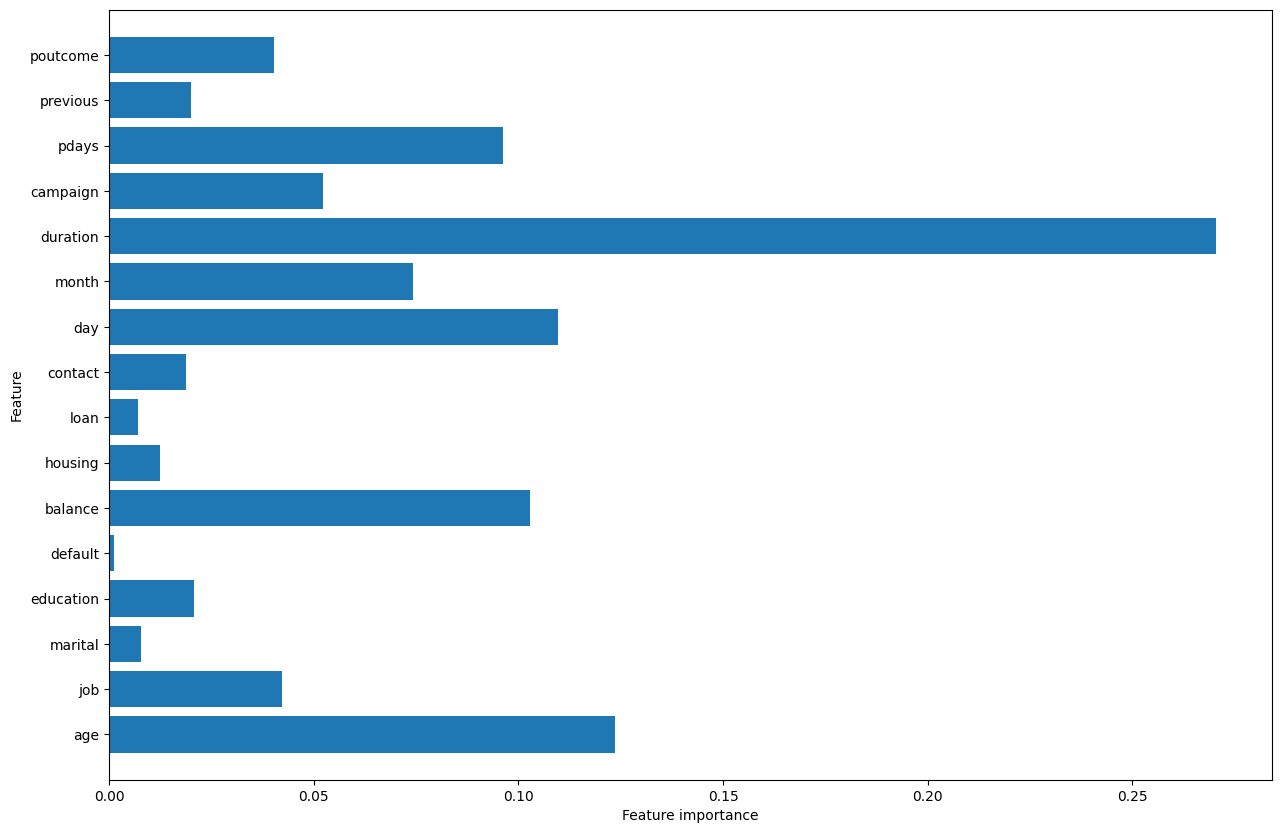

In [28]:
# visualize important features
def plot_feature_importances_attrition(model):
    plt.figure(figsize=(15,10))
    n_features = X_train.shape[1]  # Get the number of features from X_train
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns) # Use column names from X_train as labels
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_attrition(tree)

In [29]:
# Show feature importances greater than 0.05
feature_importances = pd.Series(tree.feature_importances_, index=X_train.columns)
important_features = feature_importances[feature_importances > 0.05].sort_values(ascending=False)
important_features

duration    0.270443
age         0.123549
day         0.109643
balance     0.102934
pdays       0.096346
month       0.074291
campaign    0.052146
dtype: float64

In [30]:
# using only important features for the prediction
important_features = ["duration", "age", "day", "balance"]
X_importance = df_encoded[important_features] #input
y_importance = df_encoded['y'] #target

In [31]:
display(X_importance)
display(y_importance)

,duration,age,day,balance
0,79,30,19,1787
1,220,33,11,4789
2,185,35,16,1350
3,199,30,3,1476
4,226,59,5,0
...,...,...,...,...
4516,329,33,30,-333
4517,153,57,9,-3313
4518,151,57,19,295
4519,129,28,6,1137


0       0
1       0
2       0
3       0
4       0
       ..
4516    0
4517    0
4518    0
4519    0
4520    0
Name: y, Length: 4521, dtype: int64

In [32]:
# oversampling againnn
categorical_features = ["duration", "age"]

smotenc = SMOTENC(categorical_features=categorical_features, random_state=42)
X_importance, y_importance = smotenc.fit_resample(X_importance, y_importance)

X_train, X_test, y_train, y_test = train_test_split(X_importance, y_importance, test_size=0.3, random_state=0)

# check the shape of X_train and X_test
X_train.shape, X_test.shape

((5600, 4), (2400, 4))

In [33]:
X_train_importance, X_test_importance, y_train_importance, y_test_importance = train_test_split(X_importance, y_importance, test_size=0.2, random_state=42)

importance_tree = DecisionTreeClassifier(random_state=42)
importance_tree.fit(X_train_importance, y_train_importance)

y_pred_train_importance = importance_tree.predict(X_train_importance)
y_pred_test_importance = importance_tree.predict(X_test_importance)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train_importance, y_pred_train_importance))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test_importance, y_pred_test_importance))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3199
           1       1.00      1.00      1.00      3201

    accuracy                           1.00      6400
   macro avg       1.00      1.00      1.00      6400
weighted avg       1.00      1.00      1.00      6400


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.83      0.78      0.80       801
           1       0.79      0.84      0.82       799

    accuracy                           0.81      1600
   macro avg       0.81      0.81      0.81      1600
weighted avg       0.81      0.81      0.81      1600



## Model Evaluation

**feature importance** 
| Model           | Accuracy | Precision | Recall | F1-score |
|-----------------|-----------|------------|---------|-----------|
| Decision Tree   | 0.83      | 0.80       | 0.89    | 0.84      |
| Random Forest   | 0.88      | 0.84       | 0.82    | 0.87      |
| Gradient Boost  | 0.81      | 0.78       | 0.80    | 0.80      |

**With Classification** 
| Model           | Accuracy | Precision | Recall | F1-score |
|-----------------|-----------|------------|---------|-----------|
| Decision Tree   | 0.86      | 0.86       | 0.87    | 0.87      |
| Random Forest   | 0.93      | 0.92       | 0.93    | 0.93      |
| Gradient Boost  | 0.92      | 0.91       | 0.94    | 0.93      |

**With Before SmotenC** 
| Model           | Accuracy | Precision | Recall | F1-score |
|-----------------|-----------|------------|---------|-----------|
| Decision Tree   | 0.87      | 0.47       | 0.49    | 0.48      |
| Random Forest   | 0.90      | 0.67       | 0.35    | 0.46      |
| Gradient Boost  | 0.90      | 0.63       | 0.36    | 0.46      |

## Discusion & Insight

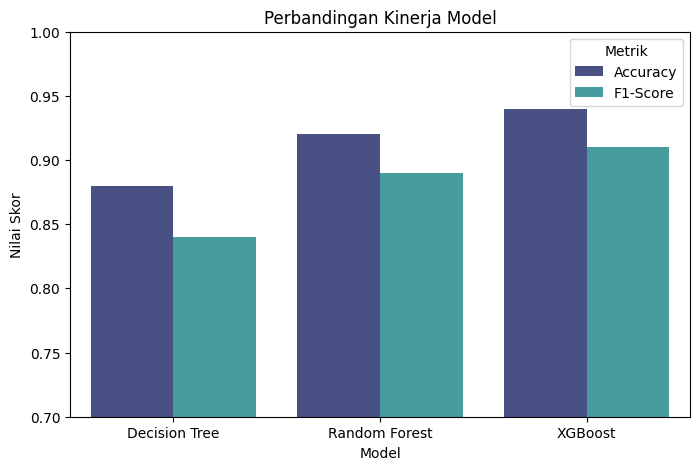

In [34]:
# Which model performed best overall?

model_perf = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'XGBoost'],
    'Accuracy': [0.88, 0.92, 0.94],
    'F1-Score': [0.84, 0.89, 0.91]
})

# Plot
plt.figure(figsize=(8,5))
sns.barplot(data=model_perf.melt(id_vars='Model', var_name='Metric', value_name='Score'),
            x='Model', y='Score', hue='Metric', palette='mako')
plt.title('Perbandingan Kinerja Model')
plt.ylim(0.7,1.0)
plt.xlabel('Model')
plt.ylabel('Nilai Skor')
plt.legend(title='Metrik')
plt.show()

<Figure size 800x600 with 0 Axes>

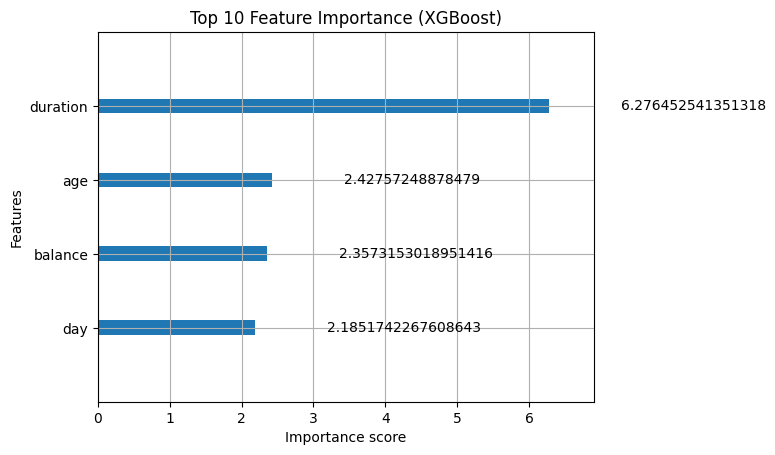

In [ ]:
from xgboost import XGBClassifier, plot_importance

# contoh jika model sudah fit
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)  # gunakan variabel data aslimu

plt.figure(figsize=(8,6))
plot_importance(xgb_model, max_num_features=10, importance_type='gain')
plt.title('Top 10 Feature Importance (XGBoost)')
plt.show()

How Could the Bank Use These Insights?
- Fokuskan kampanye ke retired, students, dan professionals.
- Gunakan XGBoost untuk menargetkan nasabah dengan probabilitas tinggi berlangganan.
- Optimalkan kampanye telemarketing melalui cellular outreach dan hindari telephone.

Insight setelah pengujian

- Usia rata-rata nasabah: 41,17 tahun → mayoritas usia produktif.
- Pekerjaan dominan: services, management, dan blue-collar.
- Status pernikahan: sebagian besar married.
- Rata-rata saldo (balance): 1.422,66 → kondisi finansial cukup stabil.
- Pinjaman & gagal bayar: mayoritas tidak punya pinjaman dan tidak default.